In [1]:
import numpy as np
import pandas as pd
import torch

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

np.random.seed(3093453)
sns.set(context="talk", style="darkgrid")


cwd = os.getcwd()
folder = "clean+translated-data"
file = "clean-de.csv"
path = "/".join( (cwd, folder, file) )

df = pd.read_csv(path, index_col=0)
df["lang"] = "de"

files = os.listdir(folder)
files = [file for file in files if re.match(r'clean-[a-z]{2}-de.csv', file)]

for file in files:
    path = "/".join( (cwd, folder, file) )
    data = pd.read_csv(path, index_col=0)
    data["lang"] = file[6:8]
    
    df = pd.concat([df, data])

del(data)
df.reset_index(inplace=True)
df

,index,Textstelle,Metapher,Kandidat,Fokus,Rahmen,orig,lang
0,0,Der politische Körper verwendet in beiden Fäll...,2,1,Zähnen und Krallen,der politische Körper,"""Der politische Körper verwendet in beiden Fä...",de
1,1,Immer noch wird durch die protestantische Lehr...,0,3,NaN,NaN,"""Immer noch wird durch die protestantische Le...",de
2,2,"Kein Zweifel, schreibt Alb. Schaeffle, vorauss...",0,3,NaN,NaN,"""Kein Zweifel"", schreibt Alb. Schaeffle 1), v...",de
3,3,Mit je weiterem Blick wir die Stoffwelt zu übe...,1,2,"Stoffwelt, verzwergt und entkleidet",unser praktisches Ideal,"""Mit je weiterem Blick wir die Stoffwelt zu ü...",de
4,4,Solange das Menschengeschlecht seinen Zerstöre...,0,3,NaN,NaN,"""Solange das Menschengeschlecht seinen Zerstö...",de
...,...,...,...,...,...,...,...,...
3990,794,Sie hat durchweg Naturwissenschaft in dem von ...,0,3,NaN,NaN,verlaufs; sie hat Naturforschung in dem von un...,da
3991,795,Wenn wir uns ein Prinzip ausdenken und darauf ...,1,2,verstellbare Puppen,staatliche Menschenverhältnisse,wenn wir uns ein Prinzip denken und auf Grund ...,da
3992,796,sieht man von dem Schimpfwort Rechtsphilosophi...,2,1,schwindsüchtig ist,daß eine Philosophie,wenn wir von dem schlechten Worte »Rechtsphilo...,da
3993,797,"Die Macht der Regierung, die verschiedenen Mot...",0,2,NaN,NaN,"»Die Macht, die das Kabinett hat, auf die vers...",da


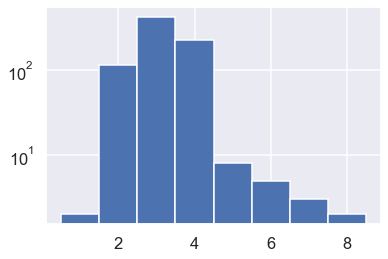

In [2]:
df.loc[(df.lang=="de"), ["Metapher", "Kandidat"]].sum(axis=1).hist(bins=np.arange(0,9)+0.5)
plt.yscale("log")

In [3]:
df[(df.lang=="de")][df.loc[(df.lang=="de"), ["Metapher", "Kandidat"]].sum(axis=1) > 5]

,index,Textstelle,Metapher,Kandidat,Fokus,Rahmen,orig,lang
36,36,Bei Beobach tung solchen moralischen Wertes ka...,8,0,das Horoskop stellen,einer Nation,Bei Beobachtung solchen moralischen Wertes ka...,de
112,112,Die Zellen verschmelzen miteinander.,0,8,NaN,NaN,Die Zellen verschmelzen miteinander.,de
141,141,Ein ganz ähnliches Schicksal war alsdann den R...,5,1,die Zügel,der Weltherrschaft,Ein ganz ähnliches Schicksal war alsdann den ...,de
170,170,"Es waren also mörderische Kriege, die wohl ims...",0,6,NaN,NaN,"Es waren also mörderische Kriege, die wohl im...",de
308,308,Wenn man die zahllosen Schwierigkeiten bedenkt...,1,6,schreiendes,Unrecht,Wenn man die zahllosen Schwierigkeiten bedenk...,de
376,376,Allerdings hat auch hier der vordringende Wahr...,6,1,Schrauben und Fugen,des alten ehrwürdigen Dogmengebäudes,30\tAllerdings hat auch hier der vordringende ...,de
504,504,"Die Organisation, wie das natürlich ist, geht ...",1,5,NaN,NaN,"Die Organisation, wie das natürlich ist, geht ...",de
515,515,"Die Worte, die man braucht, sind dann nicht Mi...",6,0,Pflugscharen zur Lockerung,Die Worte,"Die Worte, die man braucht, sind dann nicht Mi...",de
589,589,"Hier im Leben aber, in dem, was für Platon das...",4,2,pulsiert,die wirkliche Realität,"Hier im Leben aber, in dem, was für Platon das...",de
786,786,So band er das Geschlecht von heute an das ver...,4,3,starrt in das Dunkel,der Vergangenheit2,[8]: So band er das Geschlecht von heute an da...,de


In [4]:
df = df[(df.lang=="de")]

In [5]:
(df.loc[(df.lang=="de"), ["Metapher", "Kandidat"]].to_numpy().argmax(axis=1)).mean()

0.7221526908635795

# BERT CLASSIFIER

https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f

## DATASET

In [6]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Later: non-Metaphor: 0, Candidate: 1, Metaphor: 2
labels = {'business':0,
          'entertainment':1,
          'sport':2,
          'tech':3,
          'politics':4
          }

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        # binary silver labels for now
        self.labels = df.loc[(df.lang=="de"), ["Metapher", "Kandidat"]].to_numpy().argmax(axis=1)
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['Textstelle']]

    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch of inputs
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

## Train test split:

In [7]:
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

639 80 80


## Building a Bert Model

In [8]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained("redewiedergabe/bert-base-historical-german-rw-cased")
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 2)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.softmax(linear_output)

        return final_layer

In [10]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("MPS available")
    print(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:
        
        model = model.cuda()
        criterion = criterion.cuda()
            
    if torch.backends.mps.is_available():
        model = model.to("mps")
        criterion = criterion.to("mps")
        
    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 5
model = BertClassifier()
LR = 1e-6
              
train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at redewiedergabe/bert-base-historical-german-rw-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


MPS available
mps


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [02:43<00:00,  1.96it/s]


Epochs: 1 | Train Loss:  0.313                 | Train Accuracy:  0.696                 | Val Loss:  0.299                 | Val Accuracy:  0.725


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [02:34<00:00,  2.07it/s]


Epochs: 2 | Train Loss:  0.299                 | Train Accuracy:  0.718                 | Val Loss:  0.295                 | Val Accuracy:  0.725


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [02:34<00:00,  2.07it/s]


Epochs: 3 | Train Loss:  0.297                 | Train Accuracy:  0.718                 | Val Loss:  0.296                 | Val Accuracy:  0.725


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [02:33<00:00,  2.09it/s]


Epochs: 4 | Train Loss:  0.297                 | Train Accuracy:  0.718                 | Val Loss:  0.293                 | Val Accuracy:  0.725


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 320/320 [02:34<00:00,  2.07it/s]


Epochs: 5 | Train Loss:  0.292                 | Train Accuracy:  0.723                 | Val Loss:  0.293                 | Val Accuracy:  0.725


In [14]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    
    if torch.backends.mps.is_available():
        device = torch.device("mps")
        print("MPS available")

    if use_cuda:

        model = model.cuda()
        
    if torch.backends.mps.is_available():
        model = model.to("mps")
    

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:
            
            test_label = test_label.to(device)
            mask = test_input['attention_mask'].to(device)
            input_id = test_input['input_ids'].squeeze(1).to(device)
            
            output = model(input_id, mask)
            
            acc = (output.argmax(dim=1) == test_label).sum().item()
            total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

MPS available
Test Accuracy:  0.750


In [15]:
df_test[["Metapher", "Kandidat"]].to_numpy().argmax(axis=1).mean()

0.75